In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline


Connect datasets    


In [2]:
df = pd.read_csv(f'../Dataset/EasyVisa.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.describe()


,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Exploring Data

In [5]:
## Define numerical and Categorical data

numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object_]).columns

In [6]:
print('We have {} numerical_features : {}' .format(len(numerical_features), numerical_features))

print('We have {} categorical_features : {}' .format(len(categorical_features), categorical_features))



We have 3 numerical_features : Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')
We have 9 categorical_features : Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [7]:
# Proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-----------------------------------')


case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-----------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------------------------------

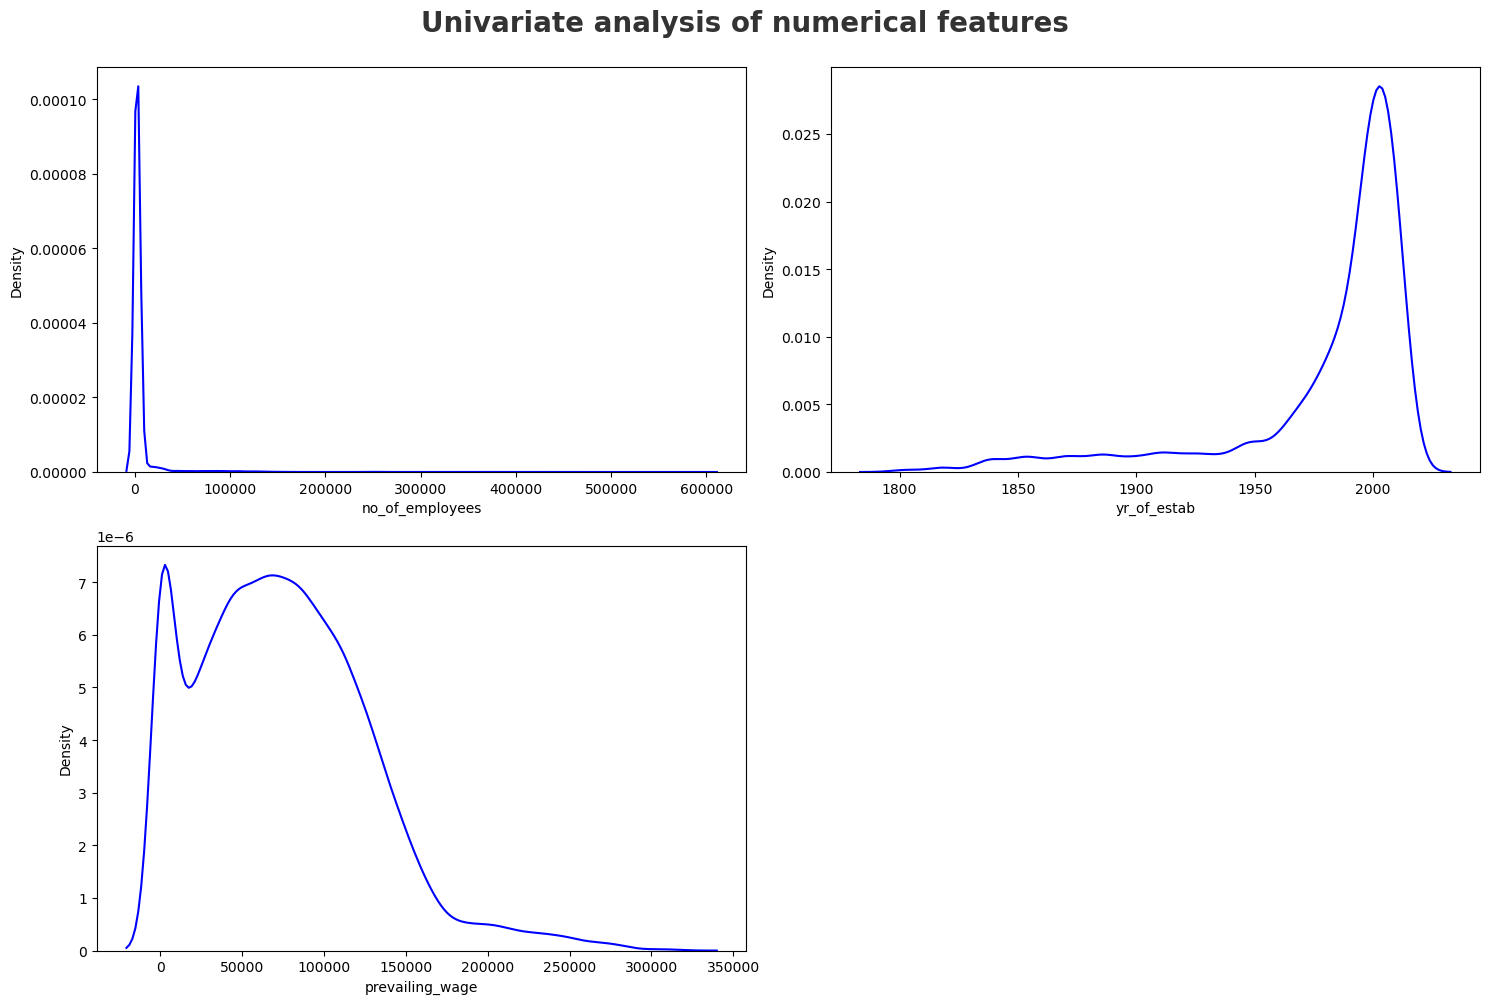

In [8]:
# Univariate distributions analysis

# Bivariate and Multivariate distributions  analysis

#Numerical feature

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate analysis of numerical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


Number of employees and privailing_wage has skewness issue. yr_of_estab has discrete value.

##Categorical features

In [9]:
categorical_features = categorical_features.drop('case_id')

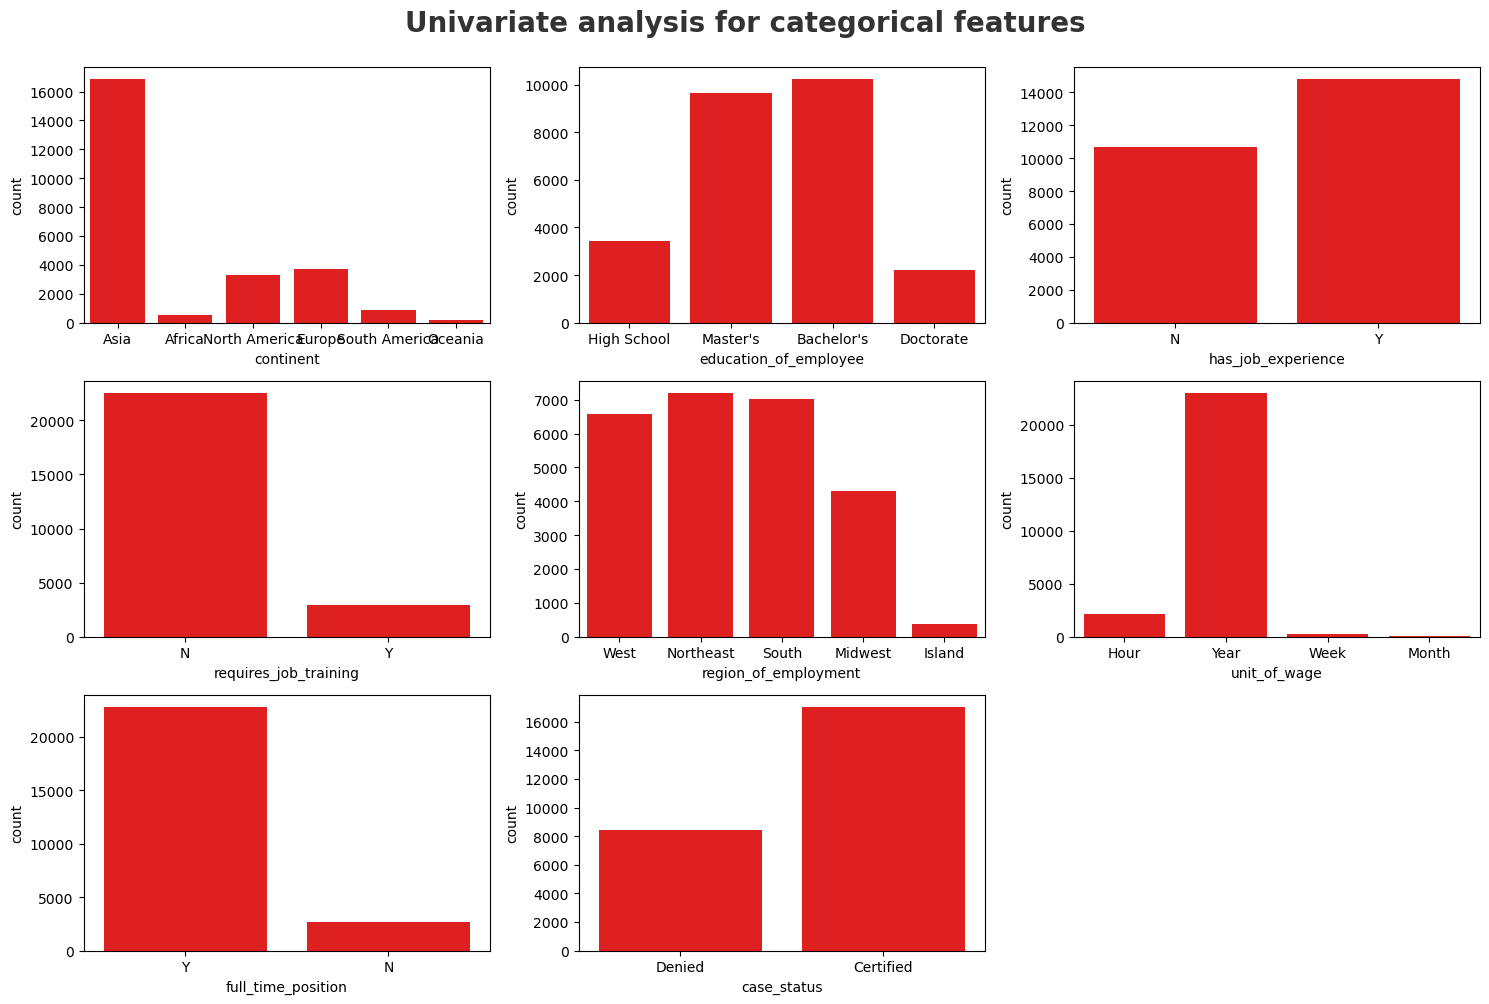

In [10]:

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate analysis for categorical features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)



for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]], color='red')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()


## Insights
       requires_job_training, unit_of_wag, full_time_position, continent are imbalanced and rest features are balanced.


In [11]:
## Multivariate Analysis
### *Analysis of more then one numerical_features

###Seperating descrete features and contineous features

descrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25]

continous_features = [feature for feature in numerical_features if feature not in descrete_features]

print('We have {} discrete_features : {}' .format(len(descrete_features), descrete_features))

print('We have {} continous_features : {}' .format(len(continous_features), continous_features))


We have 0 discrete_features : []
We have 3 continous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


## Multicolinearity Analysis of numerical features


In [12]:
df.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### There is no multicoliinearity between any numeric features.

## Multicollinearity in categorical features
*CHI-Square test


    A statistical hypothesis test that is true for all those features in the dataset that are categorical in the dataset.

    chi-square statistic is a way to show relationship between two categorical features.

    Heare we test correllation of categorical features with target coulmn.

    


Null hypothesis(H0) The feature is independent of target column (No-Correlation)

Alternative hypothesis(H1) The feature is not independent of target column (Correlation)


In [13]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features :
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1]<0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


### 'requires_job_training' fails to reject null hypothesis means it does not correlate with target column.


In [14]:
## checking null values
df.isnull().sum()


case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

##### There is no null values in any column in dataset.

#### Load again the contineus feature


In [15]:
contineous_features =[feature for feature in numerical_features if len(df[feature].unique())>=10]
print('Number of contineous features : ', contineous_features)

Number of contineous features :  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


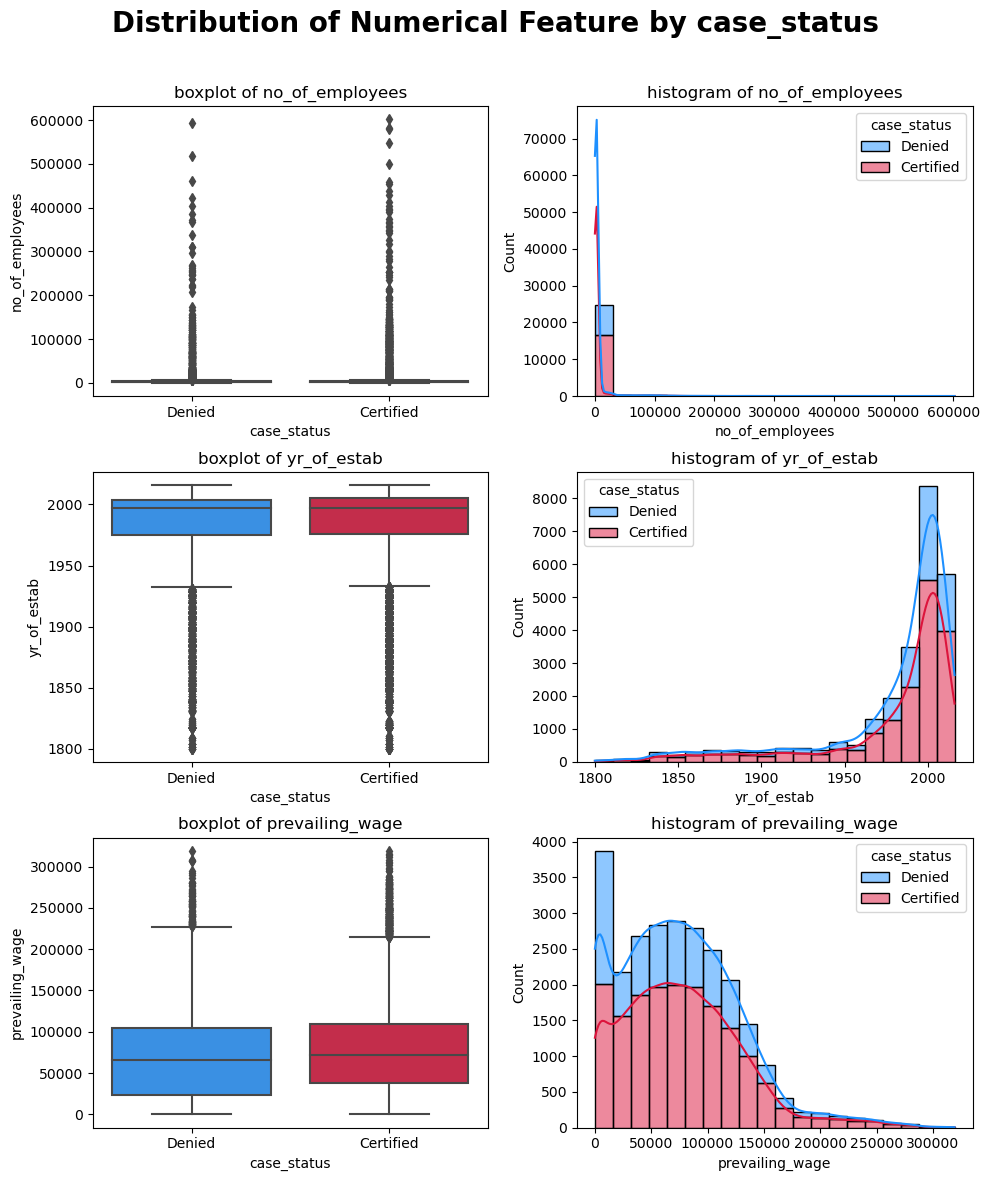

In [16]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Feature by case_status', fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(contineous_features):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins = 20, kde=True, multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'histogram of {col}', fontsize=12)   
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
                    

## Initial analysis report
#### No. of employees is right skewed and has many outliers that can be handled in feature engineering.
#### yr_of_estab is left skewed and below the lower bound of boxplot has some outliers.
#### prevailing_wage is right skewed and some outliesr above the upper bound of boxplot.
#### There is no missing values in dataset.
#### The case_id column can be deleted because each row has unique values.
#### The case_status column is the target value to predict.
#### In the categorical column features cn be made binary numerical in feature enginnering.


# Visulization
#### Visulization of target feature


In [17]:
'''
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified", "Denied"]
explode = (0, 0.1)

# Piechart using plotly library

fig = px.pie(values=percentage, labels=labels, title='Case Status Percentage', hole=.2)
#fig.update_layout(template='plotly_white')
fig.show()

#### Visulization of categorical feature
'''


'\npercentage = df.case_status.value_counts(normalize=True)*100\nlabels = ["Certified", "Denied"]\nexplode = (0, 0.1)\n\n# Piechart using plotly library\n\nfig = px.pie(values=percentage, labels=labels, title=\'Case Status Percentage\', hole=.2)\n#fig.update_layout(template=\'plotly_white\')\nfig.show()\n\n#### Visulization of categorical feature\n'

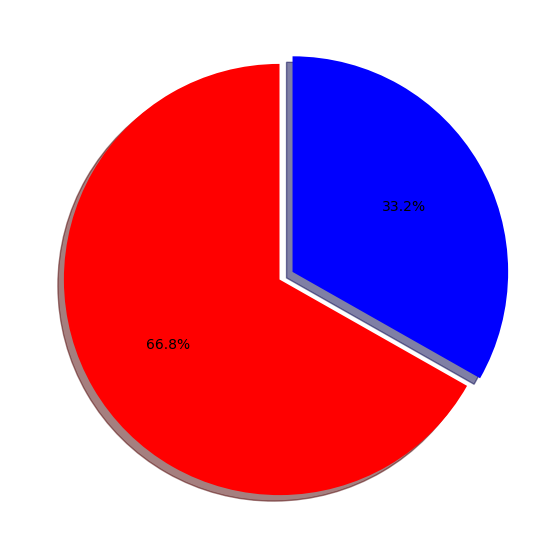

In [18]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified", "Denied"]

# plot piechart with plotly library
fig, ax = plt.subplots(figsize=(15, 7))
explode = (0, 0.07)
color=["red", "blue"]

ax.pie(percentage, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90, colors=color)
plt.show()

#### above piechart shows that target variable has imbalanced data.
### Does applicant continent has any impact on visa apoval.



In [19]:
#### group data by continent and there count of visa_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

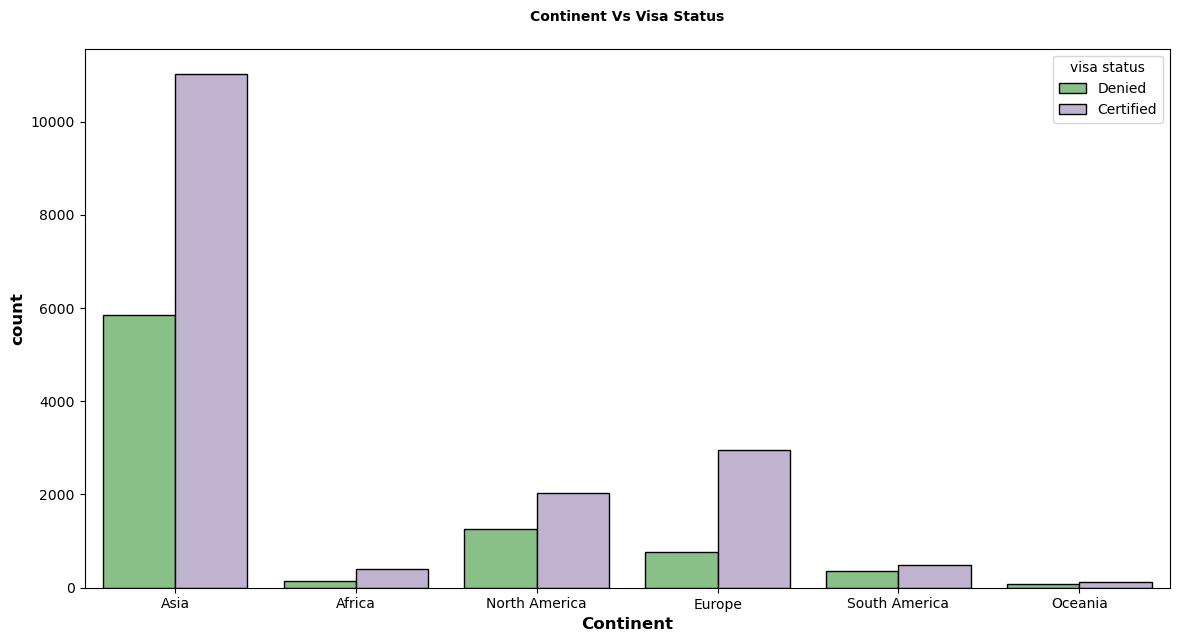

In [20]:
plt.subplots(figsize=(14,7))
sns.countplot(x='continent', hue='case_status', data =df, ec='black', palette='Accent')
plt.title('Continent Vs Visa Status', weight="bold", fontsize="medium", pad=20)
plt.ylabel('count', fontsize=12 , weight='bold')
plt.xlabel('Continent', fontsize=12, weight='bold')
plt.legend(title='visa status')
plt.show()



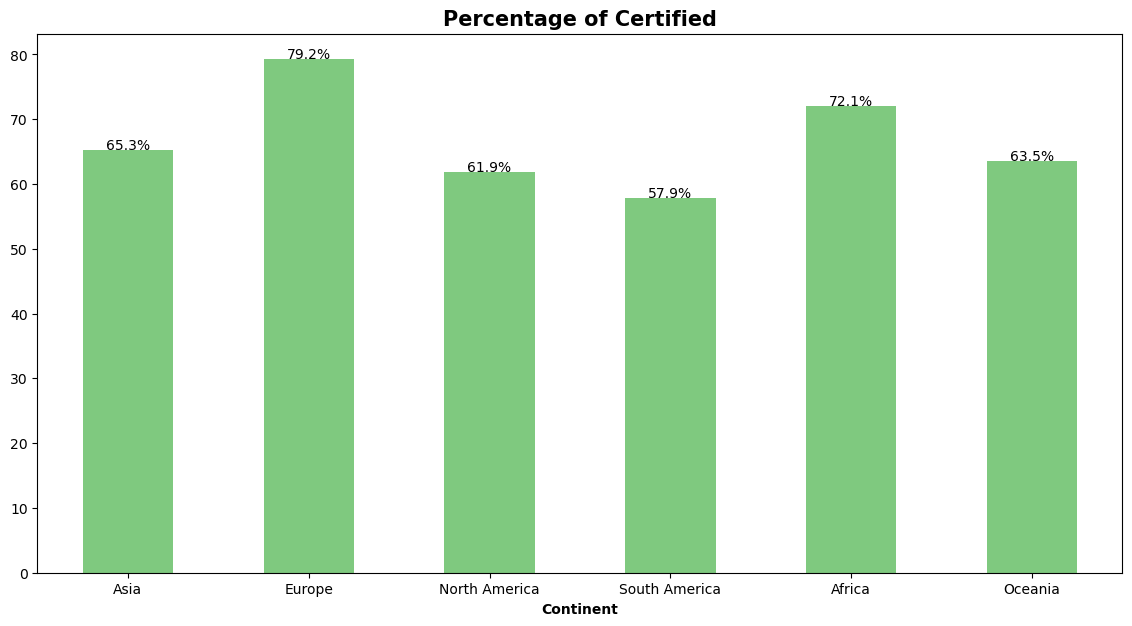

In [21]:
df2=df.copy()

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()



#### Insights
Most application of visa applicaion comming from asia.

Getting visa certified from Europe has highest chance followed by Africa.



## Applicant education Vs Case_status

##### group data by education and there count of visa_status



In [22]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True,).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

In [23]:
#result = df.groupby('education_of_employee')['case_status'].value_counts(normalize=True,).to_frame()*100
#result.columns = ['percentage']
#result = result.sort_values(by='percentage', ascending=False)
#print(result)


#result = df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage').sort_values(['education_of_employee', 'percentage'], ascending=[True, False]).set_index(['education_of_employee', 'case_status'])
#print(result)
#type(result)

#df.groupby('continent')['case_status'].value_counts(normalize=True).mul(100).rename('percentage').reset_index().pivot(index='continent', columns='case_status', values='percentage').sort_values(by='Certified', ascending=False)

#df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).mul(100).rename('proportion').reset_index().sort_values(by=['education_of_employee', 'proportion'], ascending=[True, False]).set_index(['education_of_employee', 'case_status'])

df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).mul(100).rename('proportion').reset_index().pivot(index='education_of_employee', columns='case_status', values='proportion').sort_values(by='Certified', ascending=False).stack().rename('proportion').reset_index().set_index(['education_of_employee', 'case_status'])

proportion
education_of_employee case_status            
Doctorate             Certified     87.226277
                      Denied        12.773723
Master's              Certified     78.627777
                      Denied        21.372223
Bachelor's            Certified     62.214188
                      Denied        37.785812
High School           Certified     34.035088
                      Denied        65.964912

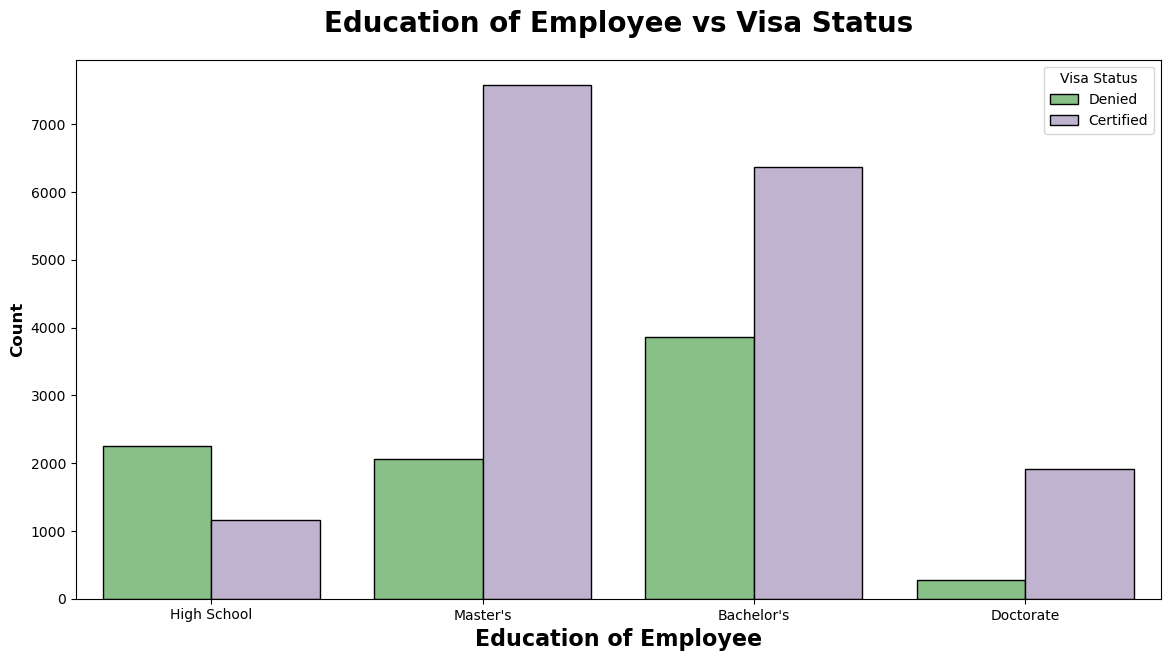

In [30]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

<Figure size 1200x800 with 0 Axes>

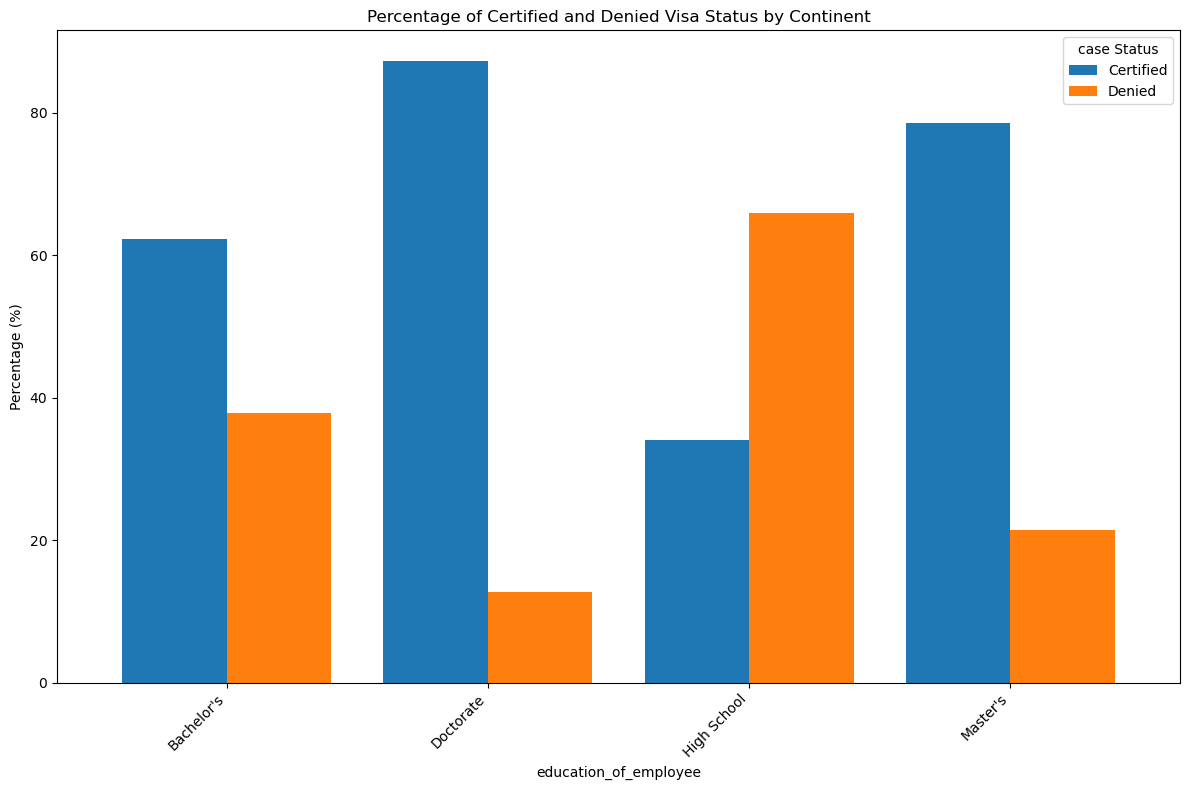

In [26]:
percentages = df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Step 2: Pivot the data to get 'Certified' and 'Denied' as columns
pivot_table = percentages.pivot(index='education_of_employee', columns='case_status', values='percentage')

# Step 3: Plot the data
plt.figure(figsize=(12, 8))
pivot_table[['Certified', 'Denied']].plot(kind='bar', figsize=(12, 8), width=0.8)
plt.xlabel('education_of_employee')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Certified and Denied Visa Status by Continent')
plt.xticks(rotation=45, ha='right')
plt.legend(title='case Status')
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


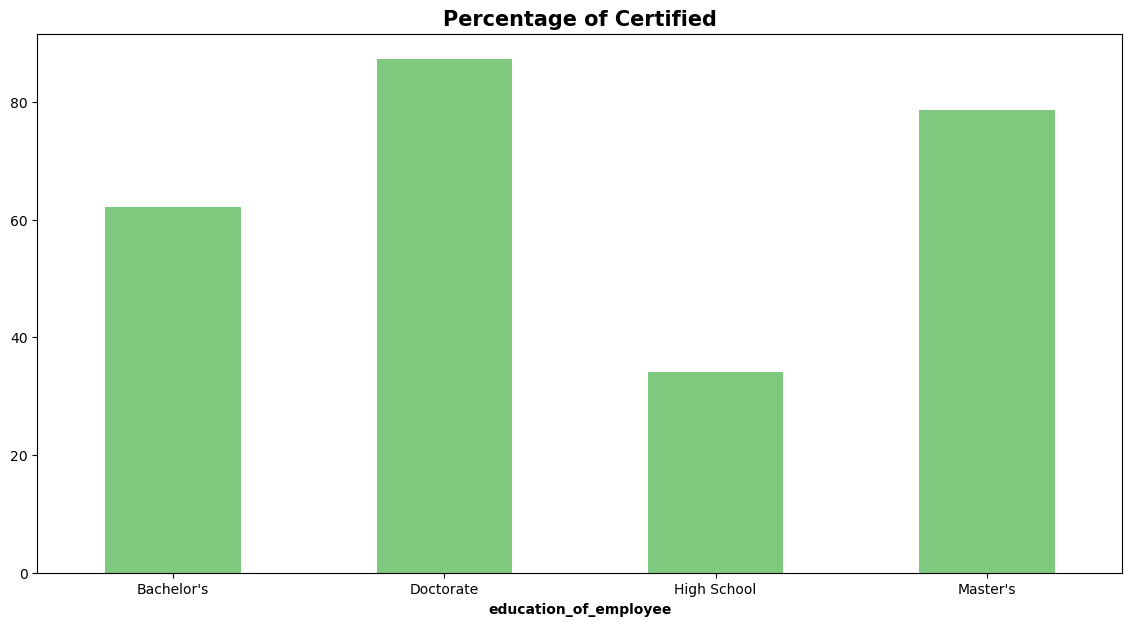

In [32]:
df_edu=df.copy()

plt.figure(figsize=[14,7])

(100*df_edu[df_edu["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df_edu['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df_edu[df_edu["case_status"].isin(['Certified'])]['continent'].value_counts()/df_edu['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n, count+0.1, strt, ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

In [29]:

'''
# Step 1: Calculate the percentages
percentages = df.groupby('continent')['case_status'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Step 2: Pivot the data to get 'Certified' and 'Denied' as columns
pivot_table = percentages.pivot(index='continent', columns='case_status', values='percentage')

# Step 3: Sort the pivot table by 'Certified' in descending order
pivot_table_sorted = pivot_table.sort_values(by='Certified', ascending=False)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))
pivot_table_sorted[['Certified', 'Denied']].plot(kind='bar', figsize=(12, 8), width=0.8)
plt.xlabel('Continent')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Certified and Denied Visa Status by Continent')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()
'''

"\n# Step 1: Calculate the percentages\npercentages = df.groupby('continent')['case_status'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()\n\n# Step 2: Pivot the data to get 'Certified' and 'Denied' as columns\npivot_table = percentages.pivot(index='continent', columns='case_status', values='percentage')\n\n# Step 3: Sort the pivot table by 'Certified' in descending order\npivot_table_sorted = pivot_table.sort_values(by='Certified', ascending=False)\n\n# Step 4: Plot the data\nplt.figure(figsize=(12, 8))\npivot_table_sorted[['Certified', 'Denied']].plot(kind='bar', figsize=(12, 8), width=0.8)\nplt.xlabel('Continent')\nplt.ylabel('Percentage (%)')\nplt.title('Percentage of Certified and Denied Visa Status by Continent')\nplt.xticks(rotation=45, ha='right')\nplt.legend(title='Case Status')\nplt.tight_layout()\nplt.show()\n"

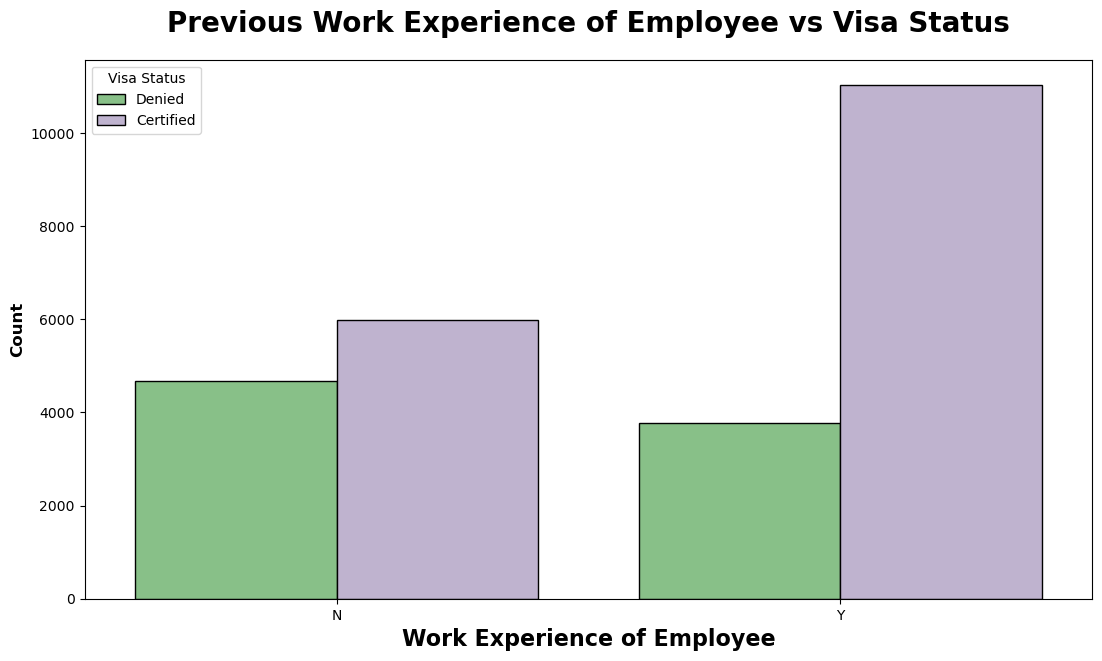

In [33]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec="black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

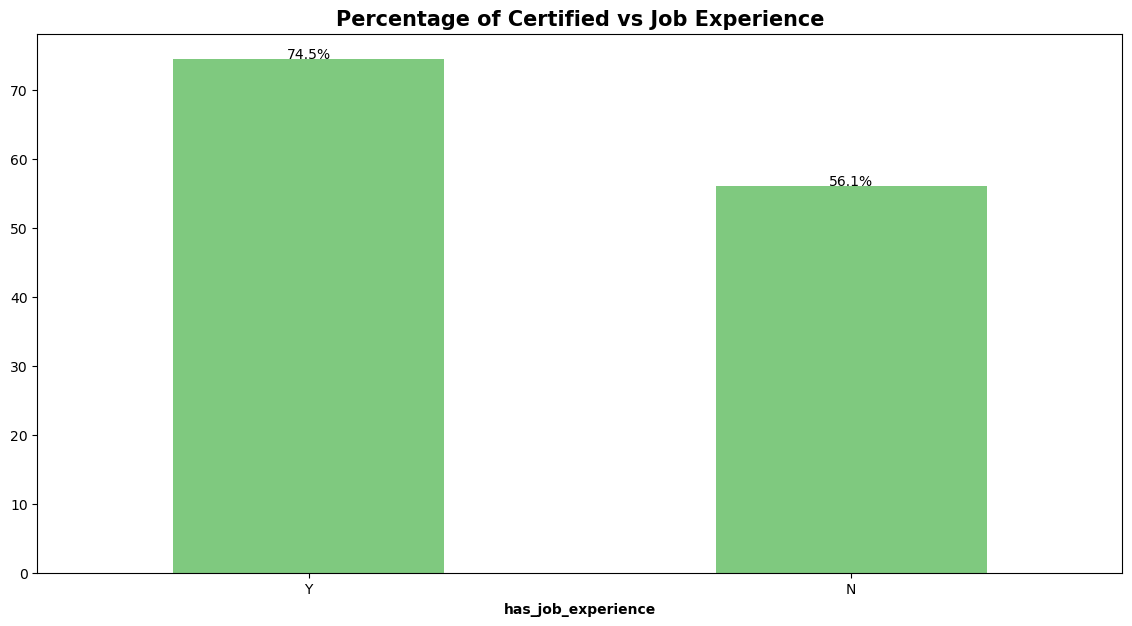

In [34]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### outcome
People has been certified 74.5%, only 25.5% applicant has been denied with previous work experience .

People with No previous work experience has been certified 56% and denied 43%.

This means work experience has effect on Visa status.

There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

In [35]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

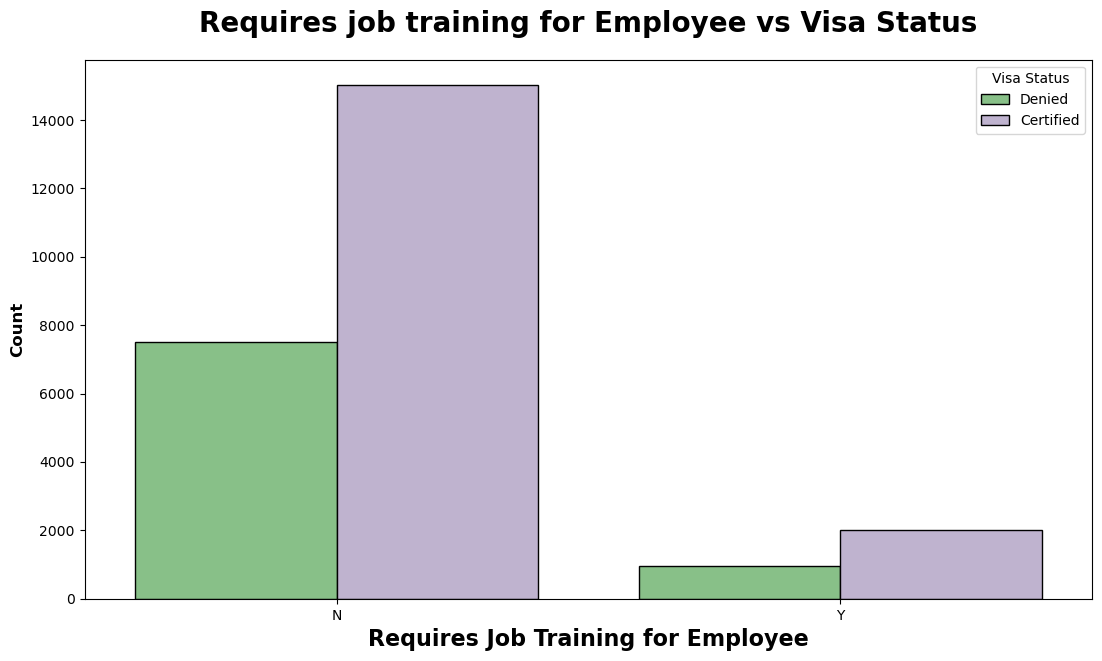

In [36]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

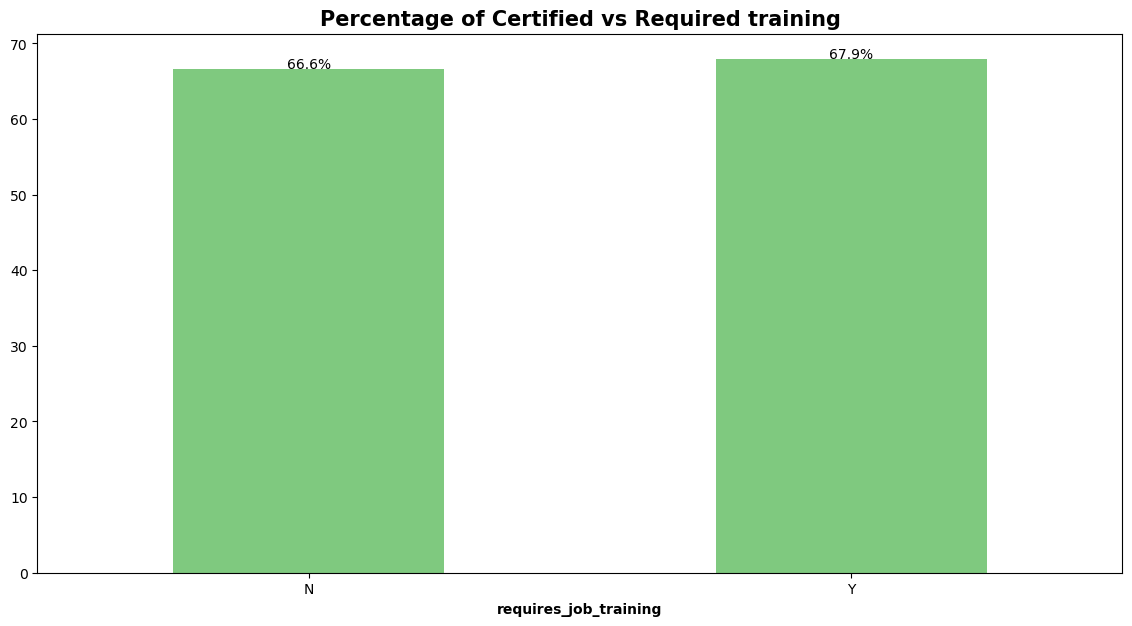

In [37]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### Outcome
training requirement doesn't have any effect on Visa status.

88% of applicant don't require job training.

63% of people who doesnt want job training got certified.

For employees who require job training 67% of people get certified.

As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

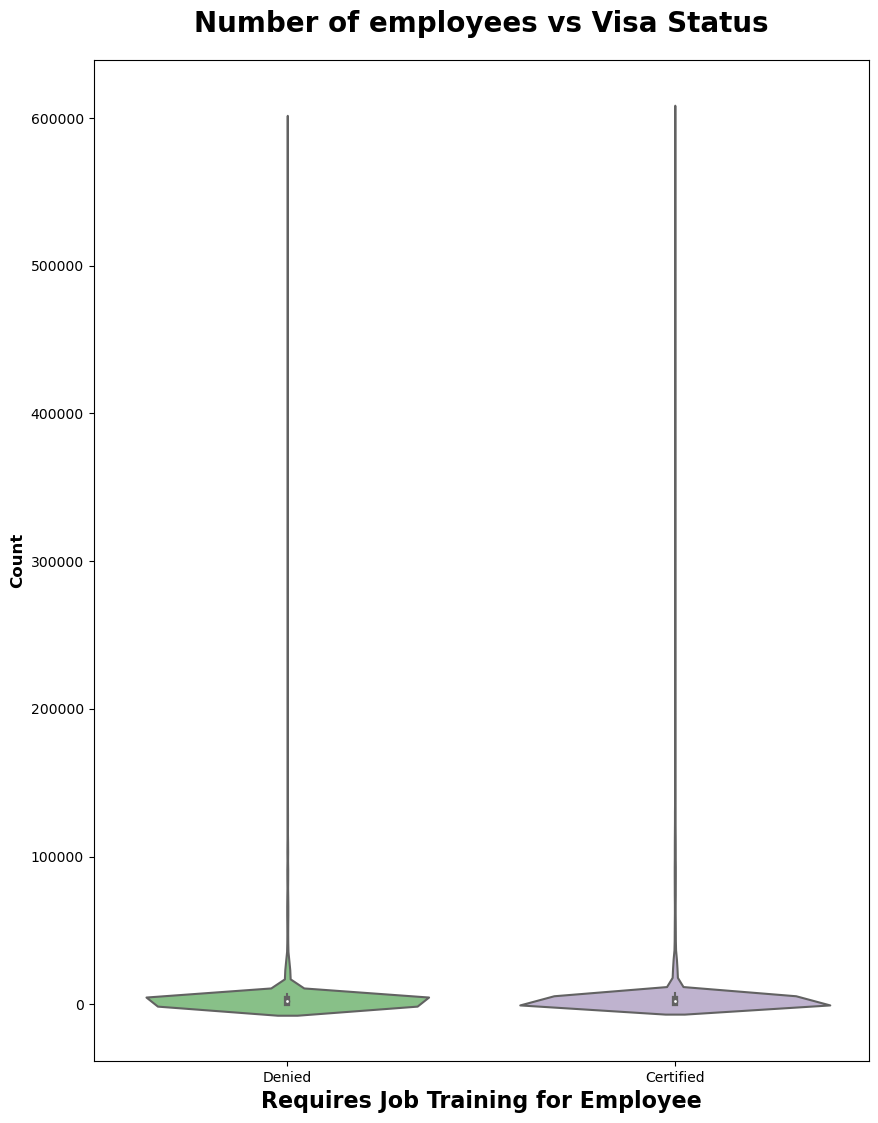

In [38]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

#### outcome
###### The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

In [40]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

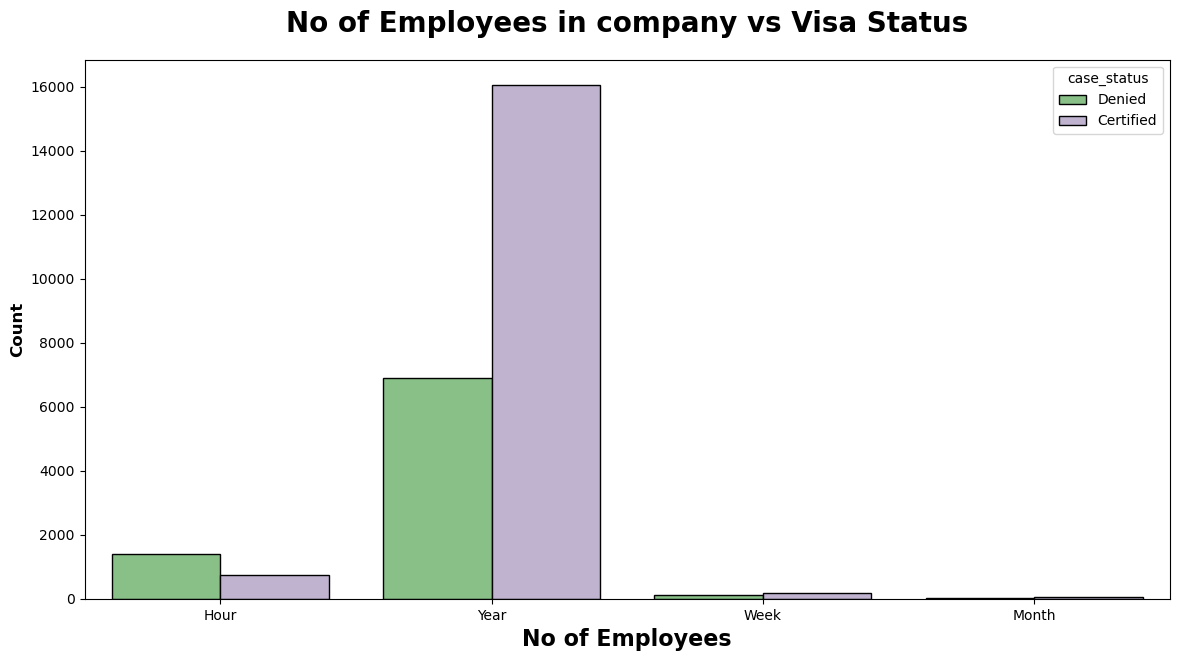

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

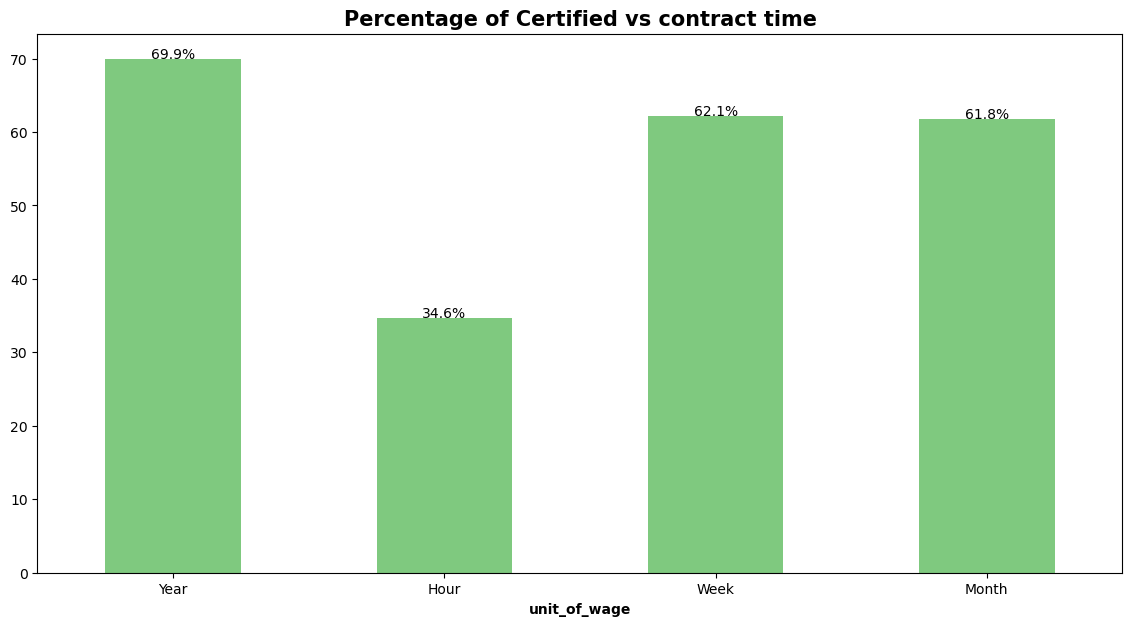

In [42]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### insights
###### For employees who applied for hourly pay 65% of them were denied.
###### Yearly unit wage application were accepted for 69% and denied for 31% of the time.
###### There is a higher chance of yearly contract than other and immediately followed by week and month.

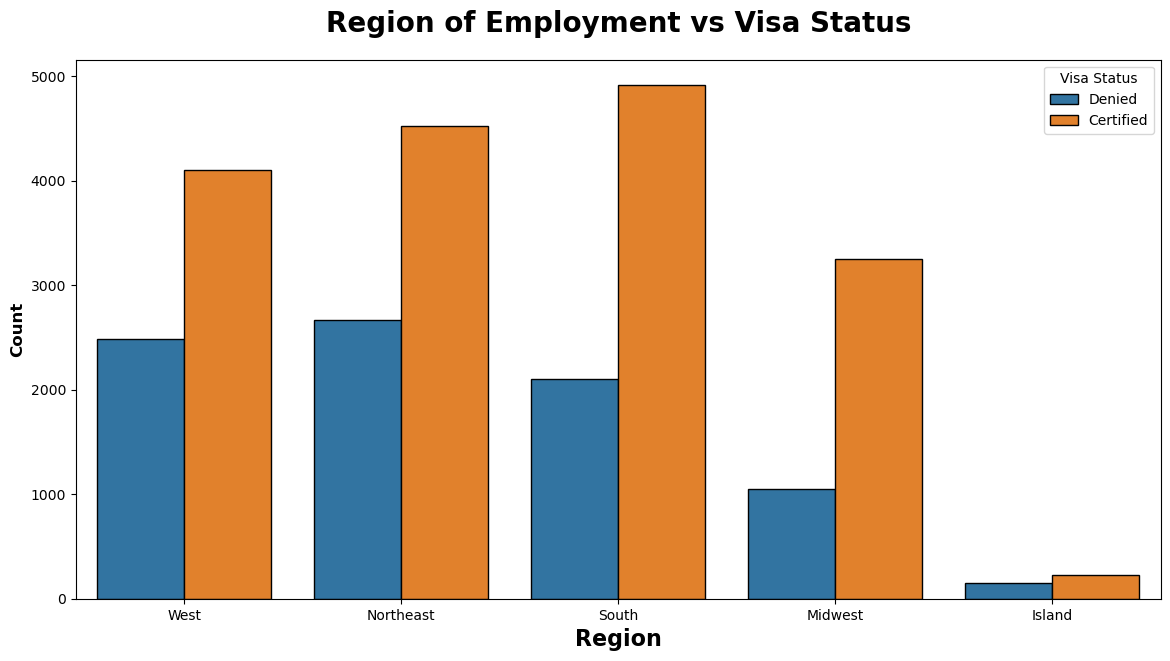

In [43]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

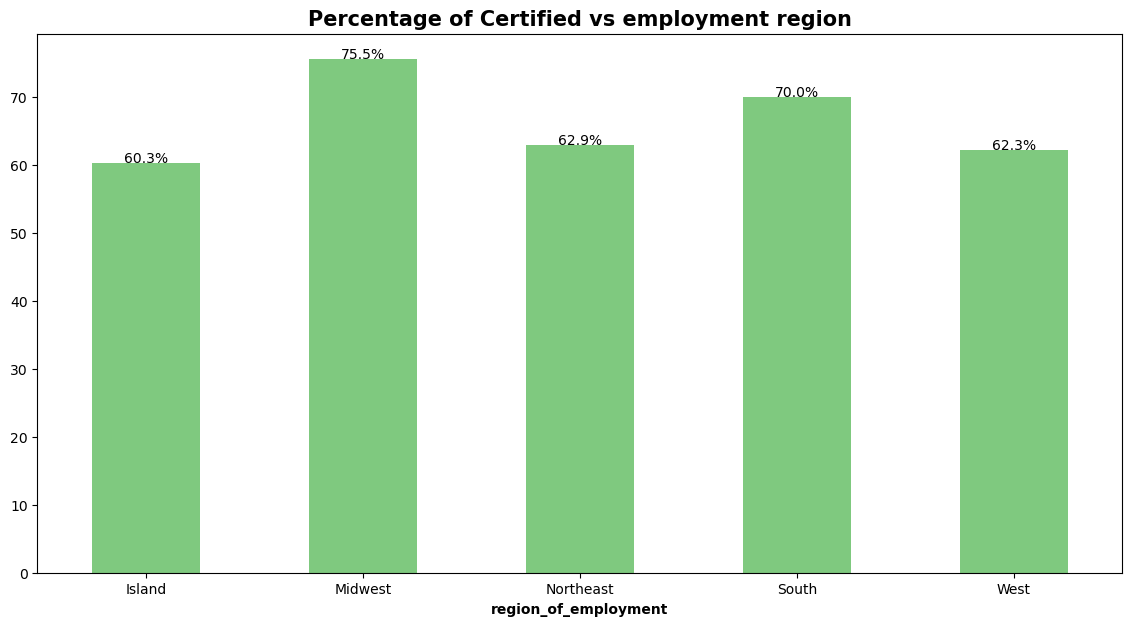

In [44]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Insight

As per chart all the region have very similar pattern of getting Visa certified and Denied.

There is a slight edge for midwest followed by South region

In [45]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

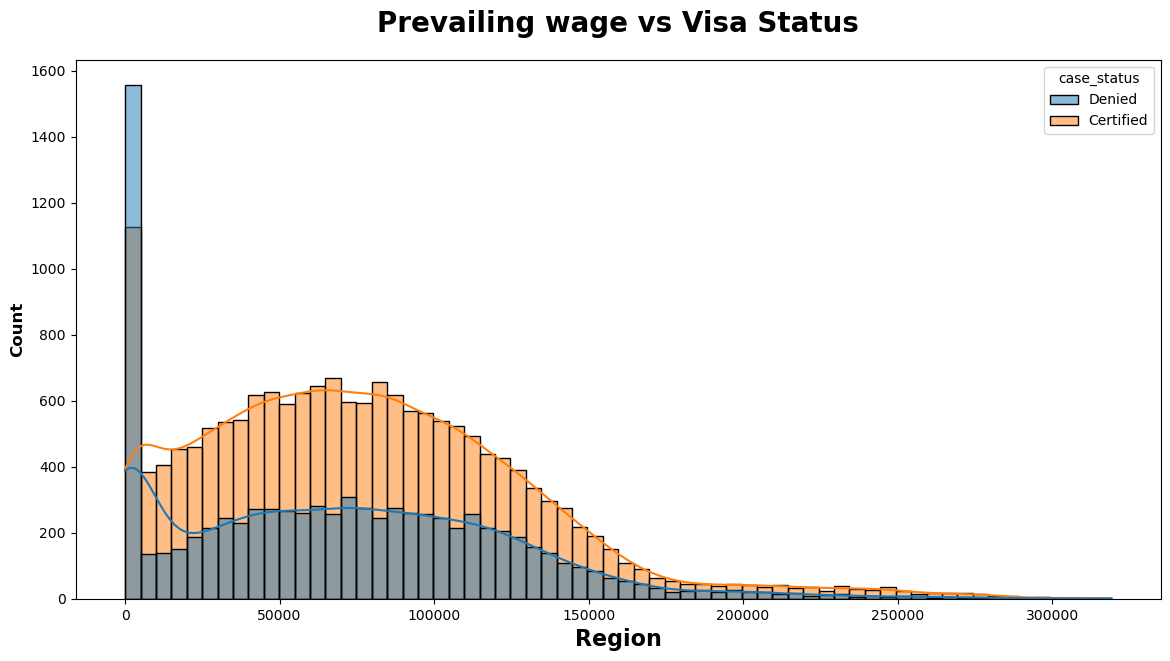

In [46]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

#### Insights

###### The distribution of both the classes are same but need to handel the outliers.

#### Prevailing wage based on Education

In [47]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


In [49]:
#### wages and its impact on visa status
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

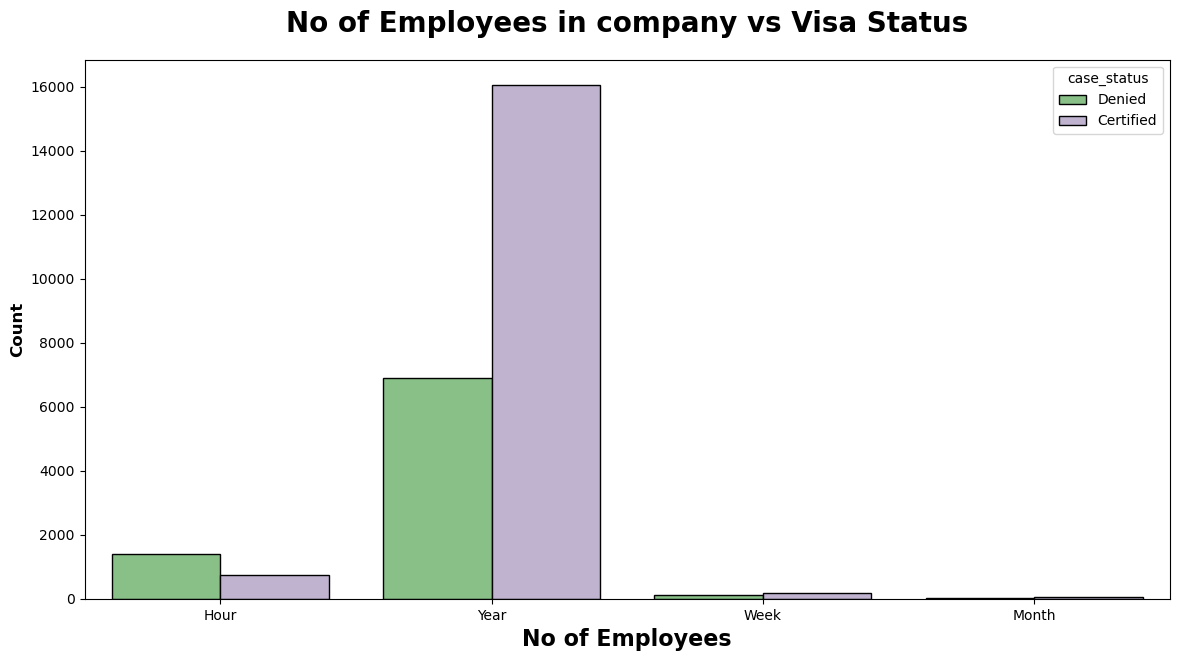

In [50]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

In [51]:
#### prevailing wage based on education
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


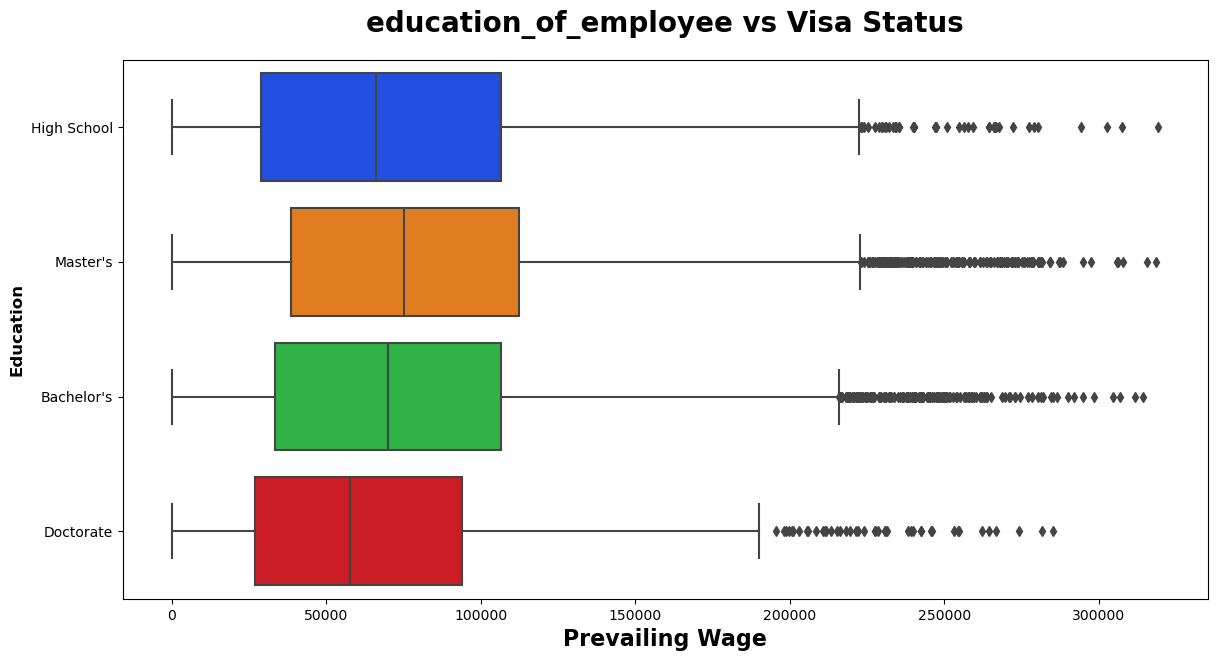

In [52]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

#### Inight

#### Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
#### Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.


In [54]:
####  Prevailing wage based on Job experience
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


#### Insight

Suprisingly people who has less job experience has more prevailing wage.

No job experience applicant has median prevailing wage as 72k USD.

Previous job experience applicant has median prevailing wage as 69K USD.

In [55]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


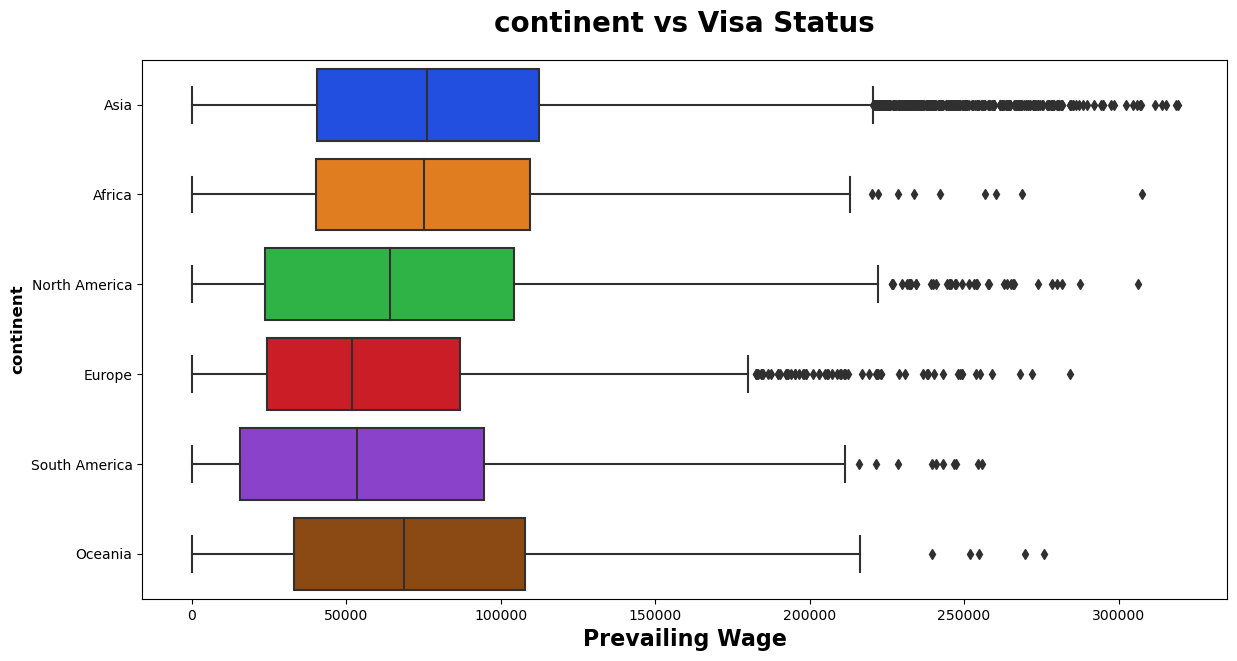

In [57]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

#### Insight

Average salary of people from Asia is higher than other continents.

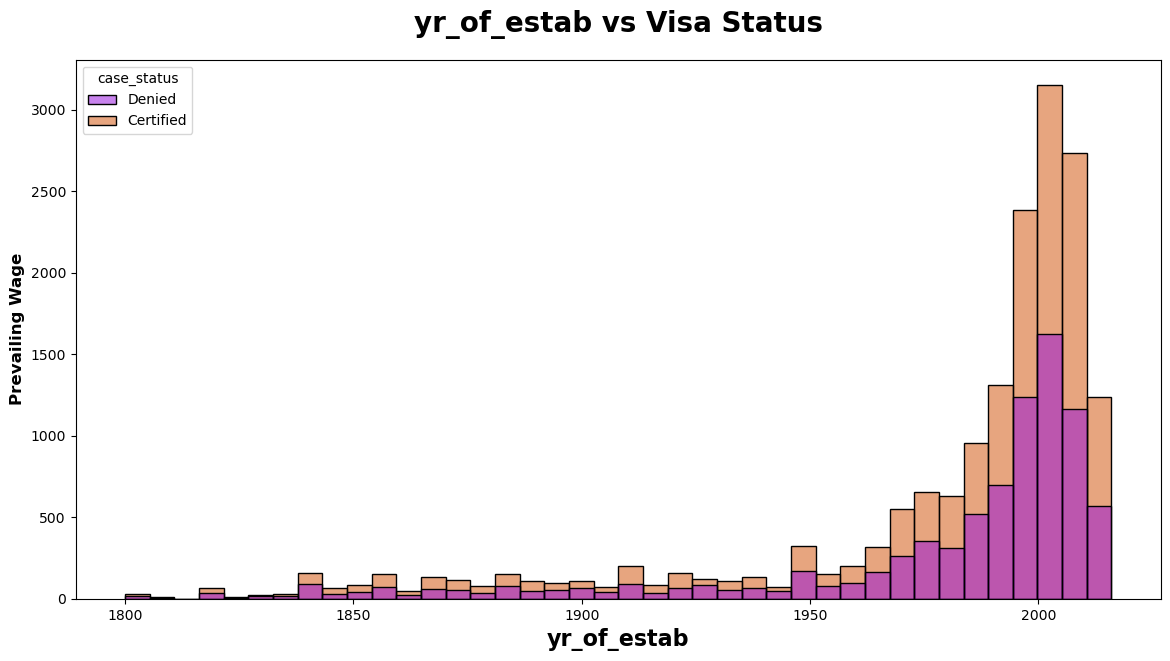

In [58]:
#### Year of Establishment

plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()